
<Mark>############################## 09/19/2025 ############################### <Mark>################################# Friday ################################

# Customer Churn HandsOn

Target Column

Churn: No - Customer still with the service

Churn: Yes - Customer left the service

Churn is a crucial infromation for a telecom company, Earning for the company comes from the customers. So it is important for the company to know that the customer they are providing the service will churn or not. Using this data we train the model. So when a New customer comes in they will be able to predict if the customer will churn.

Hence, the target is if the customer will churn or not. Here there are two class/value 'Yes' or 'No' which is nothing but binary classification

Model we are to built and train is called Logistic Regression Model



# Exploratory Data Analysis EDA
Null values

Duplicates

Outliers

Encoding


# 1 Declare Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [ ]:
df = pd.read_csv('/content/customer_churn.csv')


# 3. Show the First 5 Row

In [ ]:
df.head() # Show the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4 Show the last 5 rows

In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 5 Show the statistical summary

In [ ]:
df.describe() # Show the statistical summary

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 6 Show the Columns

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 7 Number of Rows and columns (Shape)

In [ ]:
df.shape

(7043, 21)

#8 Check if there are Null values and the total Null values

In [ ]:
df.isnull().sum().sum()

np.int64(0)

# 9 Info - summary of a DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#10. Null

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

# This Concludes Exploratory Data Analysis

#Preprocessing

#Total Charges Cleaning up

Here column 19 TotalCharges is an object, however it is a resultant field. Total Charges (Obj) = Tenure (Int) * MonthlyCharge (flt). The Result should be float and not an obejct

In [ ]:
# Find what are the different value TotalCharges hold
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
#There are 11 values that is either blank or null.
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There is No Null in total charges


In [ ]:
#Below are the records the has the value  ''
df[df['TotalCharges'].str.strip() == '']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Here tenure represents the duration of the service, for the rows the has ' ' in total charges have tenure == 0. Total Charges (Obj) = Tenure (Int) * MonthlyCharge (flt). Churn is No, which mean the customer is still with the company. So the possibility are that theyjust joined the company.

It is safer to update the spaces to zero.


In [ ]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Converts invalid entries (like ' ', 'abc', etc.) to NaN.
                                                                         # it will convert any non-numeric values — including spaces like  — into




In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Now you can see TotalCharges has 11 Null values (spaces converted to Null)
# Now you can fill the null values with one of these value
# 1. Fill it with Zero
# 2. Fill it with Formula Mothlycharge * Tenure
# 3. Fill it with Monthly charges

# 2. Fill it with Formula Mothlycharge * Tenure Reason, - You preserve business logic. - You avoid injecting misleading values.

df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Outliers

This can be identified by using Box plot. Caveat is it is applicable on the Numerical Field

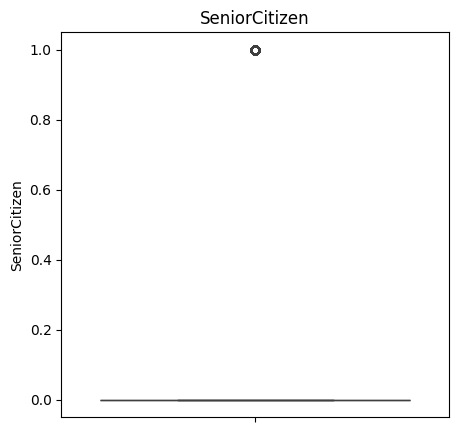

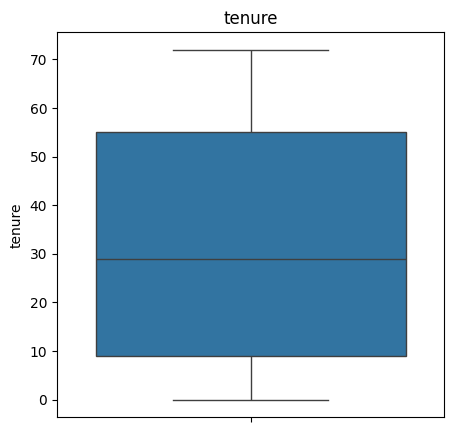

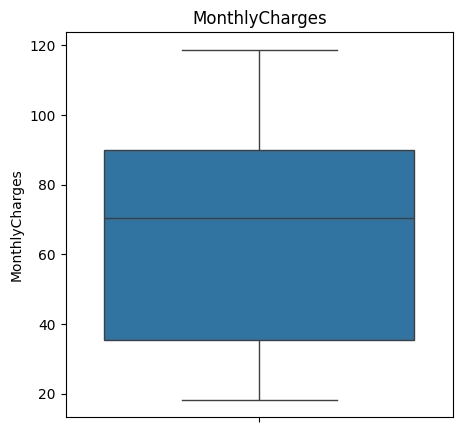

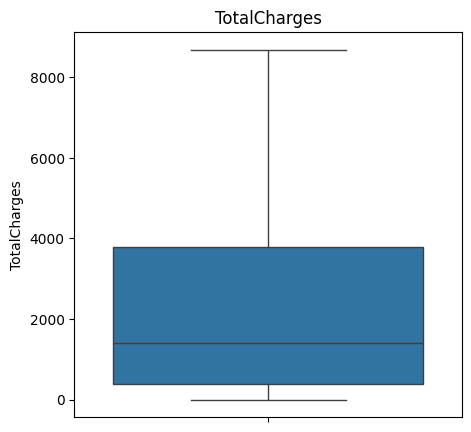

In [ ]:
for col in df.columns:
  if(df[col].dtype !='object'):
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

# Drop Insignificance Column

In [ ]:
# Customer ID
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Customer ID is gone

# Encoding

What Is Encoding?

Encoding means converting something into a format that machines can understand.
In data science and machine learning, it usually refers to turning words or categories into numbers, because models can’t work with text directly.


Encoding: The most common type encoding are

1. **Label Encoding** - Converts each category into a unique integer.
- Example: {'Male': 0, 'Female': 1}
- Use case: Ordinal data (e.g., education levels).
- Caution: Implies order—even when none exists.

2. **One-Hot Encoding** - Creates binary columns for each category.
- Example: {'Red': [1,0,0], 'Blue': [0,1,0], 'Green': [0,0,1]}
- Use case: Nominal data with few categories.
- Caution: Can lead to high dimensionality.

3. Ordinal Encoding
- Categories are mapped to numbers based on order.
- Example: ["Low", "Medium", "High"] → ["Low" = 1, "Medium" = 2, "High" = 3]
- Use only when the order matters.

4. Target Encoding (Mean Encoding)
- Replaces categories with the mean of the target variable.
- Example: If Churn rate for Region A is 0.2, encode Region A as 0.2.
- Use case: High-cardinality categorical features.
- Caution: Risk of data leakage—use cross-validation or smoothing.

5. Frequency Encoding
- Encodes categories based on their frequency in the dataset.
- Example: {'A': 100, 'B': 50, 'C': 10}
- Use case: Quick and simple for tree-based models.

6. Binary Encoding
- Converts categories into binary numbers and splits into columns.
- Example: Category A → 001, Category B → 010
- Use case: High-cardinality features with fewer columns than one-hot.

7. Hash Encoding
- Uses a hashing function to map categories to fixed-length vectors.
- Use case: Very high-cardinality features (e.g., user IDs).
- Caution: Risk of collisions (different categories mapped to same value).

8. Text Embedding (for NLP)
- Words are converted into vectors (lists of numbers) that capture meaning.
- Example: "king" and "queen" might have similar embeddings because they’re related.
- Used in NLP models like BERT, GPT, etc.


In [ ]:
# For all the column that are object encode it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

•	fit() is used on training data only — it learns the rules.
•	transform() is used on any data — it applies the rules.
•	fit_transform() is a convenient combo for training data.

le = Label Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


Now everthing is in numbers and almost ready for trainer model

#Aim

Target Column
Churn: No - Customer still with the service
Churn: Yes - Customer left the service

Churn is a crucial infromation for a telecom company, Earning for the company comes from the customers. So it is important for the company to know that the customer they are providing the service will churn or not. Using this data we train the model. So when a New customer comes in they will be able to predict if the customer will churn.

Hence, the target is if the customer will churn or not.
Here there are two class/value 'Yes' or 'No' which is nothing but binary classification

Model we are to built and train is called Logistic Regression Model


## **Model Building**

In suprevised learning, Every model will follow some steps

1. Split the data
2. Split in train and test
3. Train the model
4. Test the model
5. Evaluation

**1. Split the data**

•	Start with a clean dataset.
•	Separate features (X) and target (y).
X = df.drop('target_column', axis=1)
y = df['target_column']
What you mean by Split the Data?
Below are columns from a data frame

A     B     C     D     E     F     G-Target



Here columns A, B, C, D, E, and F are the independent Features and the column G (Target) are dependent Feature. Depending on columns A, B, C, D, E, and F the target column will have values
Independent columns will be known as X
dependent columns will be known as Y

X is the actual data and Y is the answer part.



In [ ]:
x = df.drop( columns =['Churn']) # X has the data with no target column(Churn)
y = df['Churn']

In [ ]:
x.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y.head(5)

,Churn
0,0
1,0
2,1
3,0
4,1


- During the exam, the student gets questions (X_test) and writes answers (y_pred).
- The teacher has the correct answers (y_test) but doesn’t show them until grading.
- The comparison between student answers and correct answers gives the score — just like accuracy, precision, recall, etc.

A	B	C	D	E	F	G-Target


Here columns A, B, C, D, E, and F are the independent Features and the column G (Target) are dependent Feature. Depending on columns A, B, C, D, E, and F the target column will have values
Independent columns will be known as X
dependent columns will be known as Y

X is the actual data and Y is the answer part.

Here we divided data into two parts namely Independent (X) part and the dependent (Y) part.

Training the student

During the training period teacher gives the student 10 questions and gives answers and explain how the answers were derived as a result the student learns how to resolve/find answers to the question.

Testing the student

Teacher gives the student few questions from the subject that was taught to see if the student has learned from the teaching and developed his/her knowledge. Answers are not given during the test.

When the student passes the test, it confirms that the student now has knowledge to answer the question and resolve the problem
In the future when similar problems/questions arise the student is in a good position to answer the question and resolve the problem.

During school days in a given year, students spent 11 months in learning and takes various tests for 1 month. Here the year is split into two portions learning/training and testing. Though the tests are for a month students learns/trains a lot during the 11 months period.

Similarly, think model as the student, like splitting training and testing, the data is split into two parts, training and testing. More the training better the result which means more the data, better the performance of the model

Analogy: Training and Testing a student
Training Phase
•	The teacher gives the student questions with answers.

•	The student learns how to solve them.

•	This is like training the model — it learns patterns from labeled data.

Testing Phase

•	The teacher gives new questions without answers.

•	The student must solve them using what they learned.

•	This is like testing the model — we evaluate how well it generalizes.
Split the given data into two parts (depending on the volume of data you can allot training data size)




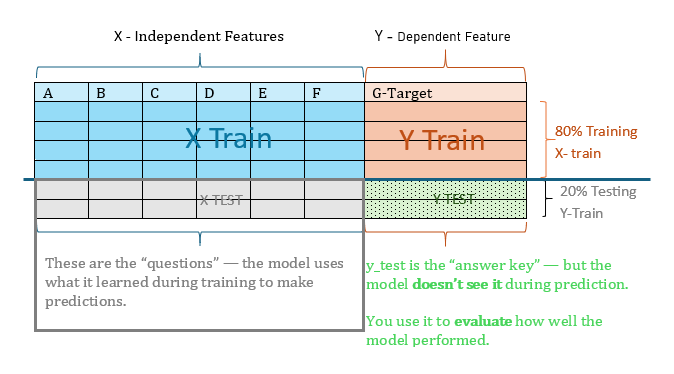

Model is given questions and answers from which model finds the pattern.
•	During the exam, the student gets questions (X_test) and writes answers (y_pred).

•	The teacher has the correct answers (y_test) but doesn’t show them until grading.

•	The comparison between student answers and correct answers gives the score — just like accuracy, precision, recall, etc.


**2. Split in train and test**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df.shape

(7043, 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 22) # Test size = 0.2 represents the test size.
                                                                                            # random_state = 22 means System retains the random data selected Intially.
                                                                                            # if random_state = 22 not mentioned then system pick data randomly every it is executed

In [ ]:
print("DF Shape: ", df.shape,
      "\nIndependent: ", x.shape, "without Churn",
      "\nDependent: ", y.shape, "Only Churn",
      "\n(X)Train Question: ", x_train.shape, "80% of Independent",
      "\n(Y)Train Answer: ", y_train.shape,"80% of Dependent",
      "\n(X)Test Questions: ", x_test.shape,"20% of Independent")

DF Shape:  (7043, 20) 
Independent:  (7043, 19) without Churn 
Dependent:  (7043,) Only Churn 
(X)Train Question:  (5634, 19) 80% of Independent 
(Y)Train Answer:  (5634,) 80% of Dependent 
(X)Test Questions:  (1409, 19) 20% of Independent


**3. Train the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

**4. Test the Model**

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

compare the result

In [ ]:
# below is the original answer.
y_test

,Churn
6187,0
6448,1
5492,0
2028,0
5376,0
...,...
3480,0
1645,1
1327,1
5077,0


**5. Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Karthik Model Accuracy: ",accuracy_score(y_test, y_pred)*100) # Number of correct Prediction / Total number of Prediction
print(classification_report(y_test, y_pred))


Karthik Model Accuracy:  77.9985805535841
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1012
           1       0.64      0.50      0.56       397

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.78      0.77      1409



**Model Performance Summary**
✅ Overall Accuracy: ~78%
- Your model correctly predicted outcomes for 78% of the test data.
- Good baseline, especially for business contexts like churn prediction.

In our model data, majority of the value are categorical


**Interpretation**

• 	Class 0 (Non-Churn): Model performs well — high precision and recall.

• 	Class 1 (Churn): Lower recall (0.50) means it's missing many actual churn cases.

This is common in imbalanced datasets — the model favors the majority class


**Business Insight**
"While the model performs well overall, it struggles to identify churners accurately. This could lead to missed retention opportunities. Improving recall for churn class is key."

# Confusion Matrix

It’s a table that compares the model’s predictions with the actual outcomes. It shows how many times the model got things right and how many times it got things wrong — broken down by class.

In [ ]:
from sklearn.metrics import confusion_matrix

# Now you can use it
print(confusion_matrix(y_test, y_pred))

[[902 110]
 [200 197]]


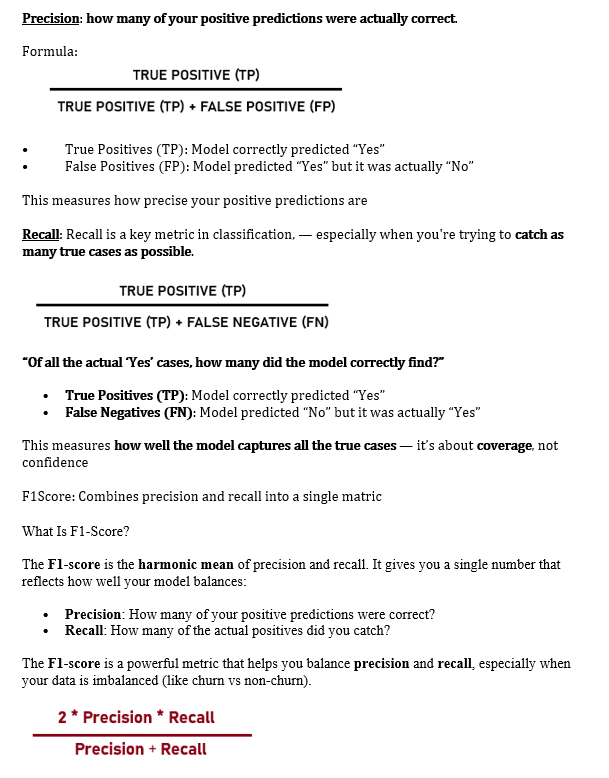